# Advances in Machine Learning with Big Data

### (part 1 of 2) 
### Trinity 2020 Weeks 1 - 4
### Dr Jeremy Large
#### jeremy.large@economics.ox.ac.uk


&#169; Jeremy Large ; shared under [CC BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/)

## 3. Data abundance and 'jaggedness' -> regularization and the problem of overfit

## 4. Regularization through resampling methods (bootstrap etc.)

## Contents Weeks 1-4:

1. Introducing this course's dataset

1. Being an econometrician _and_ a data scientist

1. **Data abundance and 'jaggedness' -> regularization and the problem of overfit**

1. **Regularization through resampling methods (bootstrap etc.)**

1. Regularization through predictor/feature selection (Lasso etc.)

1. Moving from linear regression to the perceptron

1. Moving from linear regression to the random forest (and similar)

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
plt.rcParams['figure.figsize'] = [12, 4]

import sys, os
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO)

# point at library; I need some lessons on doing good PYTHONPATHs:
REPO_DIR = os.path.dirname(os.getcwd())
UCI_LIB = os.path.join(REPO_DIR, 'lib')
sys.path.append(UCI_LIB)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np  
import pandas as pd  

In [3]:
#  pull in scikit-learn libraries:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold

In [4]:
import sbs_sklearn    # module where I've put some functions from the last class

### Recall our linear model

In [5]:
df, invalids, invoices = sbs_sklearn.get_standard_data()

2020-04-10 16:42:34,208 INFO:Loading C:\Users\jerem\Documents\work\Oxford\SBS\MLBD\ox-sbs-ml-bd\data\raw.csv , sheet Year 2009-2010
2020-04-10 16:42:37,275 INFO:Loaded C:\Users\jerem\Documents\work\Oxford\SBS\MLBD\ox-sbs-ml-bd\data\raw.csv , sheet number one, obviously


In [6]:
#  First, we'll have to build some additional columns in our dataframe to take account of the logarithms and squaring:
invoices['hour_sqd'] = invoices.hour**2
invoices['log_inv_spend'] = np.log(invoices.invoice_spend)
invoices['log_n_codes'] = np.log(invoices.codes_in_invoice)
invoices['log_n_items'] = np.log(invoices.items_in_invoice)

In [7]:
# Regarding this, set out `y` and `X` variables:
y = pd.DataFrame(invoices['log_inv_spend'])
X = invoices[['log_n_codes', 'log_n_items', 'hour', 'month', 'words_per_item']] # , 'hour_sqd'

In study 1/750, 28 datapoints were held back for testing; first 10 such points = [ 705  953 1282 1535 1719 1758 2050 2576 3256 3478]


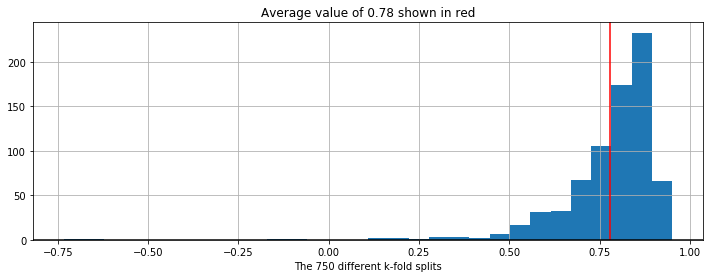

In [10]:
scores = sbs_sklearn.train_n_test(X, y, 750, verbose=False)
sbs_sklearn.mfe_r2_diag(scores, histogram=True)

Mis-specified it may be, but this modelling is working to an R2 of ~80% when applied to 'unseen' data